In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


# Carga del conjunto de datos

In [7]:
df = pd.read_csv("../data/processed/eda-diabetes.csv")

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construcción del modelo Boosting

Modelo base de Boosting

In [8]:
gb_base = GradientBoostingClassifier(random_state=42)

gb_base.fit(X_train, y_train)

y_pred_base = gb_base.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)

accuracy_base

0.7597402597402597

Ajuste de hiperparámetros: n_estimators, learning_rate, max_depth

In [10]:
n_estimators_list = [50, 100, 200]
learning_rate_list = [0.05, 0.1, 0.2]

results = []

for n in n_estimators_list:
    for lr in learning_rate_list:
        model = GradientBoostingClassifier(n_estimators=n, learning_rate=lr, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((n, lr, acc))


Visualización del impacto de hiperparámetros

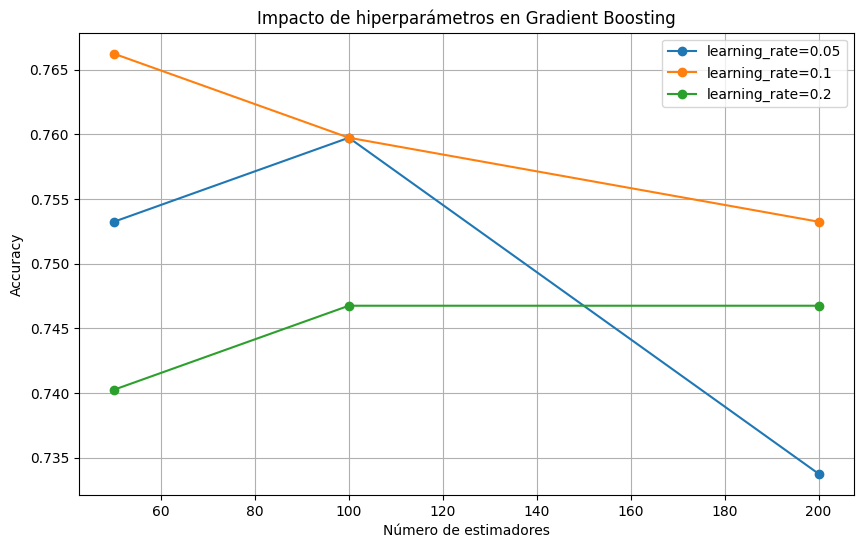

In [11]:
results_df = pd.DataFrame(results,columns=["n_estimators", "learning_rate", "accuracy"])

plt.figure(figsize=(10, 6))

for lr in learning_rate_list:
    subset = results_df[results_df["learning_rate"] == lr]
    plt.plot(subset["n_estimators"],
             subset["accuracy"],
             marker="o",
             label=f"learning_rate={lr}")

plt.xlabel("Número de estimadores")
plt.ylabel("Accuracy")
plt.title("Impacto de hiperparámetros en Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()

mejor modelo

In [ ]:
boosting_model = GradientBoostingClassifier(n_estimators=100,
                                            learning_rate=0.1,
                                            random_state=42)

boosting_model.fit(X_train, y_train)

y_pred_train = boosting_model.predict(X_train)
y_pred_test = boosting_model.predict(X_test)

accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9267100977198697, 0.7597402597402597)

In [13]:
with open("../models/diabetes_boosting.pkl", "wb") as file:
    pickle.dump(boosting_model, file)